In [1]:
# Exercise 3 (p.414, Chap.10), 8 (p.416, Chap.10), 9 (p.416, Chap.10) and 10 (p.417, Chap.10)

# Excercise 3 chapter 10

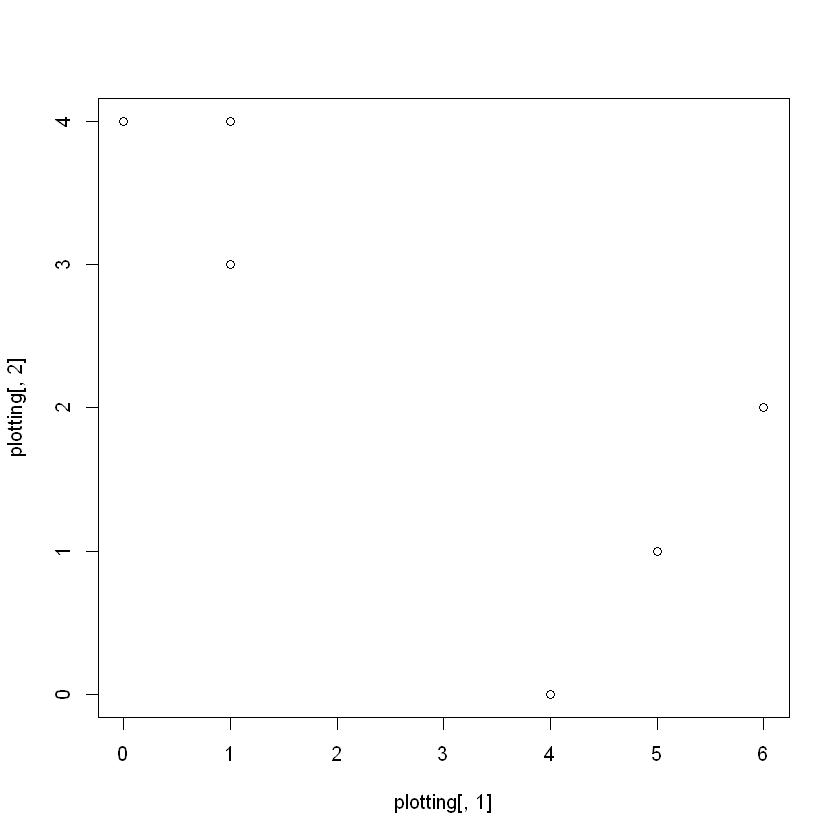

In [4]:
# (part a) Plot the observations.
plotting <- cbind(c(1, 1, 0, 5, 6, 4), c(4, 3, 4, 1, 2, 0))
plot(plotting[,1], plotting[,2])

In [5]:
#(part B) Randomly assign a cluster label to each observation. You can use the sample() command in R to do this. Report the cluster labels for each observation.
set.seed(123)
cluster <- sample(2, nrow(plotting), replace = T)
cluster


[1] 1 1 1 2 1 2

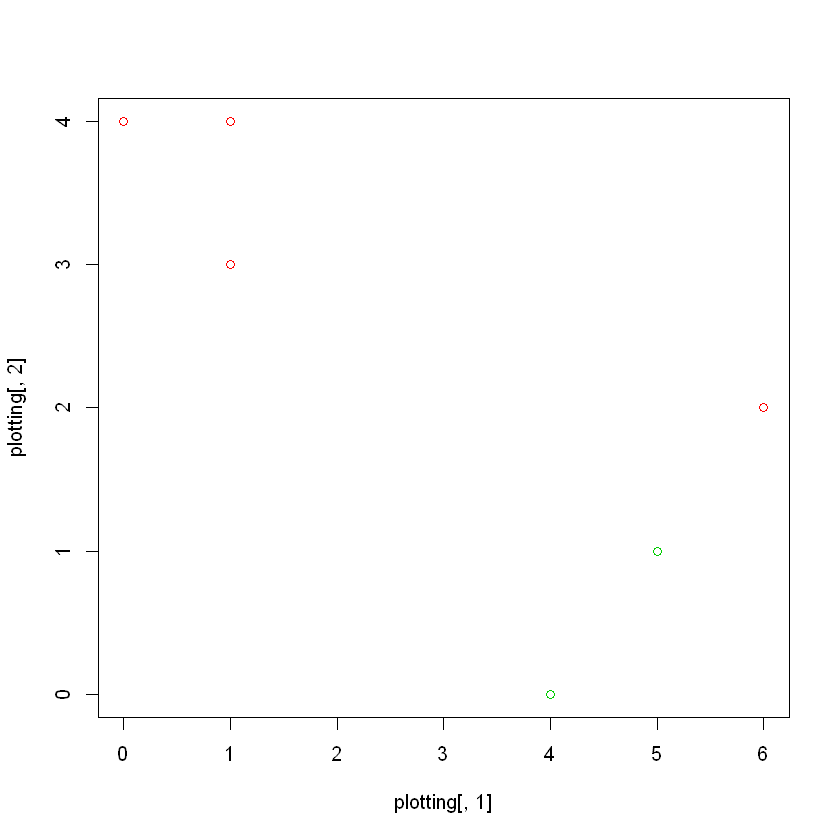

In [8]:
plot(plotting[, 1], plotting[, 2], col = (cluster + 1))

# Excercise 4 chapter 10

In [ ]:
#(part a) We don't have enough information

In [ ]:
#(part b) The 3 of them will fuse at the same height.

# Excercise 8 chapter 10

In [ ]:
# 8. In Section 10.2.3, a formula for calculating PVE was given in Equation 10.8. We also saw that the PVE can be obtained using the sdev output of the prcomp() function

In [9]:
# (part a)  Using the sdev output of the prcomp() function, as was done in Section 10.2.3.
#we take it from the book, copy paste
pr.out <- prcomp(USArrests, scale = TRUE)
pr.var <- pr.out$sdev^2
pve <- pr.var / sum(pr.var)
sum(pr.var)

[1] 4

In [10]:
pve

[1] 0.62006039 0.24744129 0.08914080 0.04335752

In [ ]:
# (part b) By applying Equation 10.8 directly. That is, use the “prcomp()” function to compute the principal component loadings. Then, use those loadings in Equation 10.8 to obtain the PVE.

In [11]:
loadings <- pr.out$rotation
USArrests2 <- scale(USArrests)
sumvar <- sum(apply(as.matrix(USArrests2)^2, 2, sum))
apply((as.matrix(USArrests2) %*% loadings)^2, 2, sum) / sumvar

PC1        PC2        PC3        PC4 
0.62006039 0.24744129 0.08914080 0.04335752

# Excercise 9 Chapter 10

In [ ]:
# Consider the USArrests data. We will now perform hierarchical clustering on the states

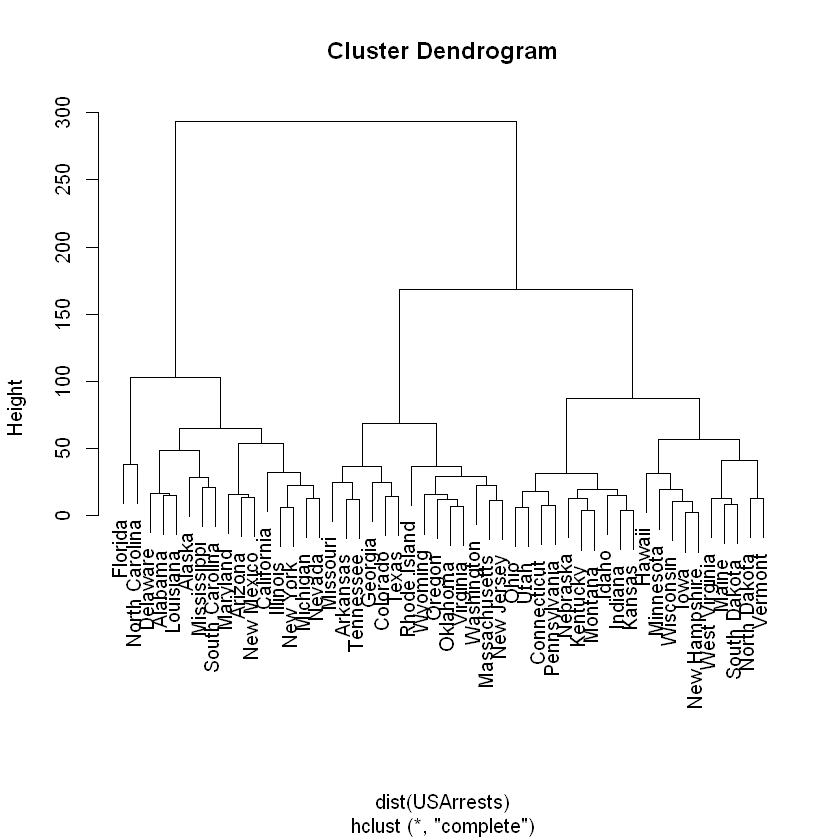

In [17]:
# (part a) Using hierarchical clustering with complete linkage and Euclidean distance, cluster the states.
#copy paste from the book page 414
set.seed(123)
hierarchical_cluster <- hclust(dist(USArrests), method = "complete")
plot(hierarchical_cluster)


In [18]:
# (part b) Cut the dendrogram at a height that results in three distinct clusters. Which states belong to which clusters?
cutree(hierarchical_cluster, 3)

Alabama         Alaska        Arizona       Arkansas     California 
             1              1              1              2              1 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              3              1              1              2 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              3              1              3              3 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             3              3              1              3              1 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             2              1              3              1              2 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
             3              3              1              3              2 
    New Mexico       New York North Carolina   North Dakota           Ohio 
             1              1              1              3              3 
      Oklahoma         Oregon   Pennsylvania   Rhode Island South Carolina 
             2              2              3              2              1 
  South Dakota      Tennessee          Texas           Utah        Vermont 
             3              2              2              3              3 
      Virginia     Washington  West Virginia      Wisconsin        Wyoming 
             2              2              3              3              2

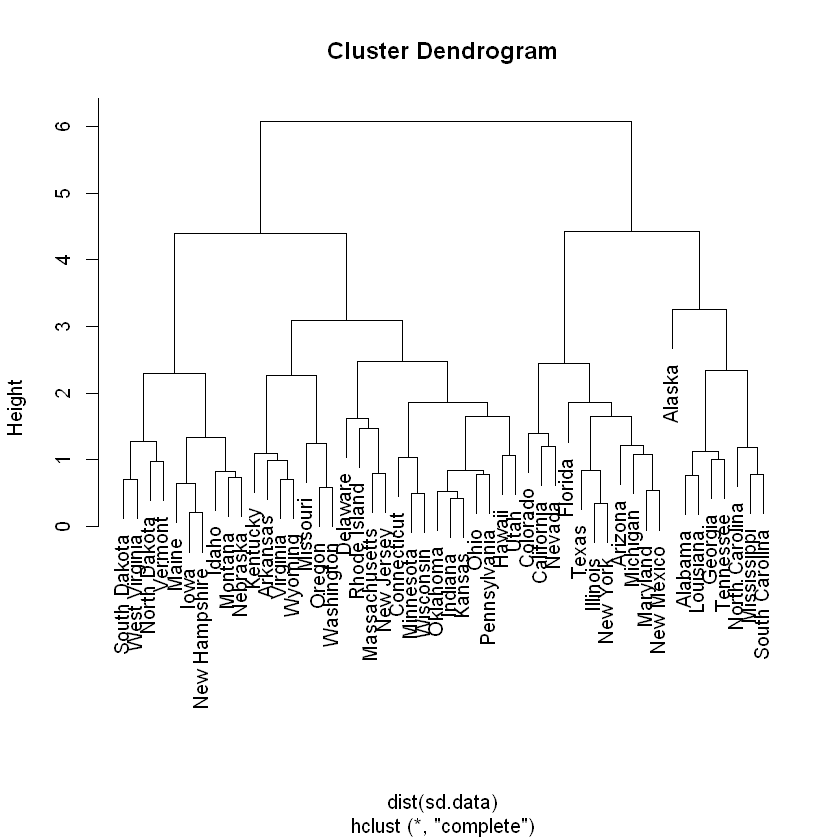

In [19]:
# (part c) Hierachically cluster the states using complete linkage and Euclidean distance, after scaling the variables to have standard deviation one.
sd.data <- scale(USArrests)
hierarchical_cluster_sd <- hclust(dist(sd.data), method = "complete")
plot(hierarchical_cluster_sd)

In [20]:
# (part d) What effect does scaling the variables have on the hierarchical clustering obtained ? In your opinion, should the variables be scaled before the inter-observation dissimilarities are computed ? Provide a justification for your answer.
cutree(hierarchical_cluster_sd, 3)

Alabama         Alaska        Arizona       Arkansas     California 
             1              1              2              3              2 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              3              3              2              1 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              3              2              3              3 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             3              3              1              3              2 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             3              2              3              1              3 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
             3              3              2              3              3 
    New Mexico       New York North Carolina   North Dakota           Ohio 
             2              2              1              3              3 
      Oklahoma         Oregon   Pennsylvania   Rhode Island South Carolina 
             3              3              3              3              1 
  South Dakota      Tennessee          Texas           Utah        Vermont 
             3              1              2              3              3 
      Virginia     Washington  West Virginia      Wisconsin        Wyoming 
             3              3              3              3              3

In [21]:
table(cutree(hierarchical_cluster, 3), cutree(hierarchical_cluster_sd, 3))

   
     1  2  3
  1  6  9  1
  2  2  2 10
  3  0  0 20

In [22]:
# We should scale the variables before.

# Excercise 10 chapter 10